## Predict the taste of wine based on various attributes

### Output should have 2 columns- ID and predicted Taste for each ID in the test data

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
 
# for error checking
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [126]:
df = pd.read_csv("winequalityN.csv")

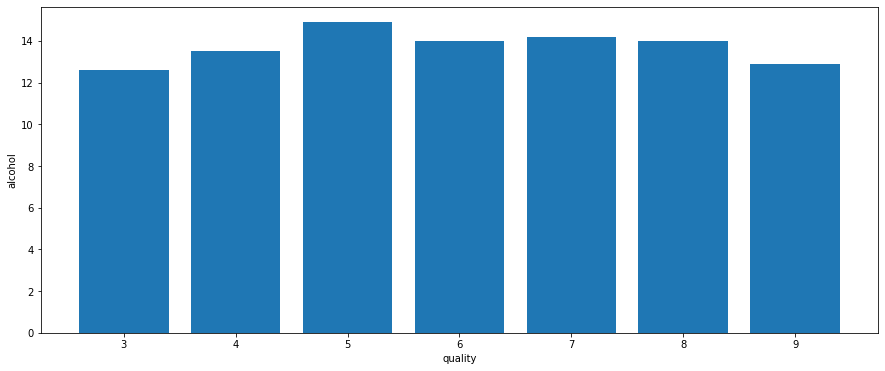

In [127]:
plt.figure(figsize=[15,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

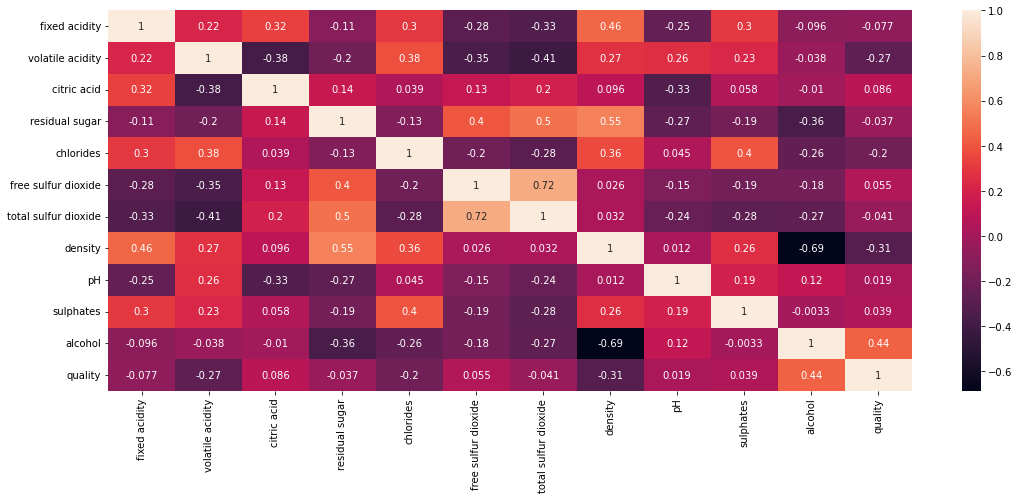

In [128]:
#Checking the correlation: 
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

In [129]:
df.corr().abs()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,0.112319,0.298421,0.283317,0.329747,0.459204,0.251814,0.300380,0.095603,0.077031
volatile acidity,0.220172,1.000000,0.378061,0.196702,0.377167,0.353230,0.414928,0.271193,0.260660,0.225476,0.038248,0.265953
citric acid,0.323736,0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,0.328689,0.057613,0.010433,0.085706
residual sugar,0.112319,0.196702,0.142486,1.000000,0.128902,0.403439,0.495820,0.552498,0.267050,0.185745,0.359706,0.036825
chlorides,0.298421,0.377167,0.039315,0.128902,1.000000,0.195042,0.279580,0.362594,0.044806,0.395332,0.256861,0.200886
free sulfur dioxide,0.283317,0.353230,0.133437,0.403439,0.195042,1.000000,0.720934,0.025717,0.145191,0.188489,0.179838,0.055463
total sulfur dioxide,0.329747,0.414928,0.195218,0.495820,0.279580,0.720934,1.000000,0.032395,0.237687,0.275381,0.265740,0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,0.686745,0.305858
pH,0.251814,0.260660,0.328689,0.267050,0.044806,0.145191,0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,0.185745,0.395332,0.188489,0.275381,0.259454,0.191248,1.000000,0.003261,0.038729


In [130]:
colm = []
# loop for columns
for i in range(len(df.corr().keys())):
# loop for rows
  for j in range(i):
    if abs(df.corr().iloc[i,j]) > 0.7:
      colm = df.corr().columns[i]

In [131]:
colm

'total sulfur dioxide'

In [132]:
new_df = df.drop('total sulfur dioxide',axis = 1)

In [133]:
new_df.isnull().sum()
new_df.update(new_df.fillna(new_df.mean()))

C:\Users\saumy\AppData\Local\Temp/ipykernel_2588/2648835144.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.update(new_df.fillna(new_df.mean()))


In [135]:
new_df.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [136]:
# no of categorical columns
cat = new_df.select_dtypes(include='O') #object
print(cat)
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

       type
0     white
1     white
2     white
3     white
4     white
...     ...
6492    red
6493    red
6494    red
6495    red
6496    red

[6497 rows x 1 columns]
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9  

In [137]:
new_df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [138]:
#df_dummies['best quality']=[1 if x>=7 else 0 for x in Dataframe.quality]
#print(df_dummies)
taste=[]
for i in df_dummies.quality:
    if i>6:
        taste.append(2) #good
    if i==6:
        taste.append(1) #normal
    if i<6:
        taste.append(0) #bad

In [139]:
taste

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,


In [140]:
df_dummies["taste"]=taste

In [142]:
# Split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df_dummies.drop(columns = ["quality", "taste"], axis=1).copy()
y = df_dummies['taste']
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8) #training data
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [143]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(5197, 11)
(5197,)
(650, 11)
(650,)
(650, 11)
(650,)


(None, None)

In [144]:
# create model variable
rnd = RandomForestClassifier()
# fit the model
#fit_rnd = rnd.fit(new_xtrain,y_train)
fit_rnd = rnd.fit(X_train,y_train)
#predict
#y_pred = list(fit_rnd.predict(new_xtest))
y_pred = list(fit_rnd.predict(X_test))

In [145]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[173  61   0]
 [ 44 221  32]
 [  3  39  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       234
           1       0.69      0.74      0.72       297
           2       0.71      0.65      0.68       119

    accuracy                           0.72       650
   macro avg       0.73      0.71      0.72       650
weighted avg       0.73      0.72      0.72       650

Accuracy: 0.7246153846153847


In [149]:
from collections import Counter
Counter(y_pred)


Counter({1: 321, 0: 220, 2: 109})

In [150]:
Taste=[]
for i in y_pred:
    if i==1:
        Taste.append("Normal")
    if i==0:
        Taste.append("Bad")
    if i==2:
        Taste.append("Good")
    
        

In [157]:
#ID from the test data 
X_test.reset_index(inplace=True)
X_test = X_test.rename(columns = {'index':'ID'})

In [158]:
X_test

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,96,6.0,0.340,0.66,15.90,0.046,26.0,0.99790,3.14,0.50,8.80,1
1,5542,9.9,0.540,0.45,2.30,0.071,16.0,0.99910,3.39,0.62,9.40,0
2,4298,5.6,0.260,0.00,10.20,0.038,13.0,0.99315,3.44,0.46,12.40,1
3,4778,5.8,0.315,0.19,19.40,0.031,28.0,0.99704,2.97,0.40,10.55,1
4,6369,6.7,0.700,0.08,3.75,0.067,8.0,0.99334,3.43,0.52,12.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...
645,4303,6.9,0.260,0.29,4.20,0.043,33.0,0.99020,3.16,0.31,12.50,1
646,3666,6.8,0.210,0.26,11.70,0.038,61.0,0.99523,3.02,0.56,10.50,1
647,4183,6.2,0.300,0.30,2.50,0.041,29.0,0.99065,3.31,0.61,11.80,1
648,404,6.8,0.220,0.31,6.30,0.035,33.0,0.99180,3.24,0.66,12.60,1


In [160]:
final = pd.DataFrame({'ID': X_test.ID, 'taste':Taste})

In [161]:
final

,ID,taste
0,96,Normal
1,5542,Bad
2,4298,Normal
3,4778,Normal
4,6369,Normal
...,...,...
645,4303,Normal
646,3666,Normal
647,4183,Good
648,404,Good


In [163]:
final_rej = final.to_csv('wine_prediction.csv', index=False)

In [164]:
df5 = pd.read_csv('wine_prediction.csv')

In [165]:
df5

,ID,taste
0,96,Normal
1,5542,Bad
2,4298,Normal
3,4778,Normal
4,6369,Normal
...,...,...
645,4303,Normal
646,3666,Normal
647,4183,Good
648,404,Good
